# Text Preprocessing

Text Preprocessing adalah serangkaian langkah yang dilakukan untuk mempersiapkan teks mentah agar siap digunakan dalam proses analisis atau model machine learning. Proses ini penting karena teks mentah sering kali tidak dapat langsung digunakan oleh algoritma komputasi. Text preprocessing bertujuan untuk membersihkan, menyederhanakan, dan mengubah teks ke dalam format yang lebih mudah diproses.

In [1]:
# !poetry add nltk

In [2]:
# !python -m nltk.downloader all

In [3]:
# !poetry add PySastrawi

## Case Folding

Case folding adalah proses mengubah seluruh teks menjadi huruf kecil. Ini dilakukan untuk memastikan bahwa semua kata diperlakukan secara konsisten tanpa memperhatikan kapitalisasi, misalnya, kata “Python” dan “python” dianggap sama.

In [4]:
sentence = "Laboratorium Fakultas Ilmu Komputer Universitas Sriwijaya mengadakan pelatihan bahasa pemrograman Python."
print(sentence)

Laboratorium Fakultas Ilmu Komputer Universitas Sriwijaya mengadakan pelatihan bahasa pemrograman Python.


In [5]:
lowercase_sentence = sentence.lower()
print(lowercase_sentence)

laboratorium fakultas ilmu komputer universitas sriwijaya mengadakan pelatihan bahasa pemrograman python.


## Tokenization

Tokenization adalah proses memecah teks menjadi unit-unit terkecil yang disebut token. Token ini bisa berupa kata, frasa, atau bahkan karakter, tergantung pada tingkat tokenisasi yang diinginkan. Misalnya, kalimat “Natural Language Processing” dapat diubah menjadi [“Natural”, “Language”, “Processing”].

In [6]:
sentence = "Pada hari Senin, tanggal 12 Agustus 2024, pelatihan bahasa pemrograman Python dimulai.\nPelatihan ini diadakan oleh Laboratorium Fakultas Ilmu Komputer Universitas Sriwijaya.\nLebih dari 1.234 mahasiswa dari berbagai fakultas yang mengikuti kegiatan tersebut.\nPython adalah salah satu bahasa pemrograman populer yang banyak digunakan oleh software engineer dan data scientist."
print(sentence)

Pada hari Senin, tanggal 12 Agustus 2024, pelatihan bahasa pemrograman Python dimulai.
Pelatihan ini diadakan oleh Laboratorium Fakultas Ilmu Komputer Universitas Sriwijaya.
Lebih dari 1.234 mahasiswa dari berbagai fakultas yang mengikuti kegiatan tersebut.
Python adalah salah satu bahasa pemrograman populer yang banyak digunakan oleh software engineer dan data scientist.


In [7]:
import re
import string

from nltk.tokenize import word_tokenize

In [8]:
lowercase_sentence = sentence.lower()
print("Case folding result:\n")
print(lowercase_sentence)

Case folding result:

pada hari senin, tanggal 12 agustus 2024, pelatihan bahasa pemrograman python dimulai.
pelatihan ini diadakan oleh laboratorium fakultas ilmu komputer universitas sriwijaya.
lebih dari 1.234 mahasiswa dari berbagai fakultas yang mengikuti kegiatan tersebut.
python adalah salah satu bahasa pemrograman populer yang banyak digunakan oleh software engineer dan data scientist.


In [9]:
# remove number
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

# remove punctuation
lowercase_sentence = lowercase_sentence.translate(
    str.maketrans("", "", string.punctuation)
)

# remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

# remove multiple whitespace into single whitespace
lowercase_sentence = re.sub(r"\s+", " ", lowercase_sentence)


tokens = word_tokenize(lowercase_sentence)

print("Tokenizing result:\n")
print(tokens)

Tokenizing result:

['pada', 'hari', 'senin', 'tanggal', 'agustus', 'pelatihan', 'bahasa', 'pemrograman', 'python', 'dimulai', 'pelatihan', 'ini', 'diadakan', 'oleh', 'laboratorium', 'fakultas', 'ilmu', 'komputer', 'universitas', 'sriwijaya', 'lebih', 'dari', 'mahasiswa', 'dari', 'berbagai', 'fakultas', 'yang', 'mengikuti', 'kegiatan', 'tersebut', 'python', 'adalah', 'salah', 'satu', 'bahasa', 'pemrograman', 'populer', 'yang', 'banyak', 'digunakan', 'oleh', 'software', 'engineer', 'dan', 'data', 'scientist']


## Term Frequency

Term frequency (TF) adalah ukuran seberapa sering suatu kata muncul dalam dokumen. Teknik ini digunakan untuk menilai pentingnya suatu kata dalam konteks dokumen tertentu. Semakin sering kata muncul, semakin tinggi nilai TF-nya.

In [10]:
from nltk.probability import FreqDist

tokens_freq = FreqDist(tokens)

print("Tokens frequency:\n")
print(tokens_freq.most_common())

Tokens frequency:

[('pelatihan', 2), ('bahasa', 2), ('pemrograman', 2), ('python', 2), ('oleh', 2), ('fakultas', 2), ('dari', 2), ('yang', 2), ('pada', 1), ('hari', 1), ('senin', 1), ('tanggal', 1), ('agustus', 1), ('dimulai', 1), ('ini', 1), ('diadakan', 1), ('laboratorium', 1), ('ilmu', 1), ('komputer', 1), ('universitas', 1), ('sriwijaya', 1), ('lebih', 1), ('mahasiswa', 1), ('berbagai', 1), ('mengikuti', 1), ('kegiatan', 1), ('tersebut', 1), ('adalah', 1), ('salah', 1), ('satu', 1), ('populer', 1), ('banyak', 1), ('digunakan', 1), ('software', 1), ('engineer', 1), ('dan', 1), ('data', 1), ('scientist', 1)]


<Axes: ylabel='Key'>

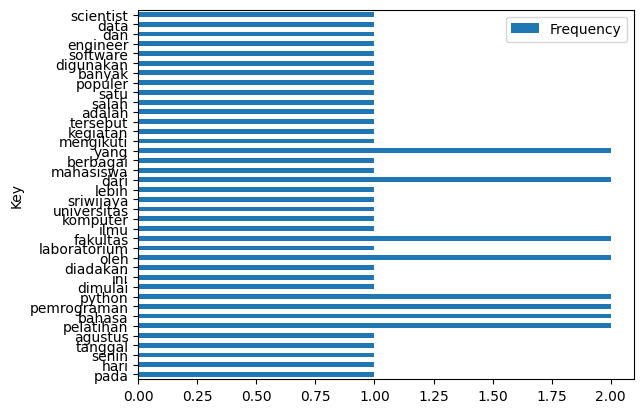

In [11]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(tokens_freq, orient="index")
df_freq_tokens.columns = ["Frequency"]
df_freq_tokens.index.name = "Key"

df_freq_tokens.plot.barh()

## Stop Words Removal

Stop words adalah kata-kata umum yang biasanya tidak memberikan banyak informasi dalam analisis teks, seperti “dan”, “atau”, “dari”, dll. Proses ini menghilangkan kata-kata tersebut untuk fokus pada kata-kata yang lebih bermakna.

Untuk beberapa kasus, kamu mungkin tidak membutuhkan stop words removal. Misalnya, untuk sentiment analysis, dimana jika kamu menghilangkan beberapa stop words, maka bisa jadi mengubah makna kalimatnya.

In [12]:
from nltk.corpus import stopwords

indonesian_stopwords = set(stopwords.words("indonesian"))
print(indonesian_stopwords)

{'dikarenakan', 'bahwasanya', 'setidaknya', 'kamilah', 'mampukah', 'pentingnya', 'agar', 'aku', 'entahlah', 'bila', 'katakan', 'tanyakan', 'semakin', 'terlebih', 'atas', 'benarkah', 'menginginkan', 'sebaiknya', 'tidakkah', 'kapan', 'mampu', 'gunakan', 'tapi', 'mengapa', 'kepada', 'apaan', 'semuanya', 'terbanyak', 'meyakinkan', 'khususnya', 'seluruh', 'sebelumnya', 'diminta', 'begini', 'bisa', 'baru', 'bulan', 'keseluruhan', 'waktu', 'paling', 'bukanlah', 'terus', 'masa', 'sangat', 'usah', 'kepadanya', 'tampak', 'berapalah', 'dikatakan', 'perlunya', 'tambahnya', 'diucapkannya', 'karena', 'beginikah', 'beri', 'sendirinya', 'teringat', 'bertanya-tanya', 'ikut', 'kami', 'mempersiapkan', 'terlihat', 'merupakan', 'kelihatannya', 'meskipun', 'didatangkan', 'sajalah', 'mulai', 'nanti', 'memisalkan', 'tiba', 'sekali', 'berlainan', 'memastikan', 'setelah', 'kita', 'lewat', 'teringat-ingat', 'selamanya', 'dimulai', 'mungkin', 'antaranya', 'diketahui', 'penting', 'merasa', 'hendak', 'sempat', 'mem

In [13]:
tokens_without_stopwords = [
    word for word in tokens_freq if not word in indonesian_stopwords
]

print("With stop words:\n")
print(tokens)
print("\nStop words removal result:\n")
print(tokens_without_stopwords)

With stop words:

['pada', 'hari', 'senin', 'tanggal', 'agustus', 'pelatihan', 'bahasa', 'pemrograman', 'python', 'dimulai', 'pelatihan', 'ini', 'diadakan', 'oleh', 'laboratorium', 'fakultas', 'ilmu', 'komputer', 'universitas', 'sriwijaya', 'lebih', 'dari', 'mahasiswa', 'dari', 'berbagai', 'fakultas', 'yang', 'mengikuti', 'kegiatan', 'tersebut', 'python', 'adalah', 'salah', 'satu', 'bahasa', 'pemrograman', 'populer', 'yang', 'banyak', 'digunakan', 'oleh', 'software', 'engineer', 'dan', 'data', 'scientist']

Stop words removal result:

['pelatihan', 'bahasa', 'pemrograman', 'python', 'fakultas', 'senin', 'tanggal', 'agustus', 'diadakan', 'laboratorium', 'ilmu', 'komputer', 'universitas', 'sriwijaya', 'mahasiswa', 'mengikuti', 'kegiatan', 'salah', 'populer', 'software', 'engineer', 'data', 'scientist']


## Stemming

Stemming adalah proses mengubah kata ke bentuk dasarnya atau akar kata. Misalnya, kata-kata seperti “running”, “runner”, dan “ran” semuanya dapat dikurangi menjadi “run”. Ini membantu mengkonsolidasikan berbagai bentuk kata menjadi satu bentuk dasar.

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

output = [(token + " : " + stemmer.stem(token)) for token in tokens_without_stopwords]

print("Stemming result:\n")
print(output)

Stemming result:

['pelatihan : latih', 'bahasa : bahasa', 'pemrograman : pemrograman', 'python : python', 'fakultas : fakultas', 'senin : senin', 'tanggal : tanggal', 'agustus : agustus', 'diadakan : ada', 'laboratorium : laboratorium', 'ilmu : ilmu', 'komputer : komputer', 'universitas : universitas', 'sriwijaya : sriwijaya', 'mahasiswa : mahasiswa', 'mengikuti : ikut', 'kegiatan : giat', 'salah : salah', 'populer : populer', 'software : software', 'engineer : engineer', 'data : data', 'scientist : scientist']


In [15]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

plurals = [
    "caresses",
    "flies",
    "dies",
    "mules",
    "denied",
    "died",
    "agreed",
    "owned",
    "humbled",
    "sized",
    "meeting",
    "stating",
    "siezing",
    "itemization",
    "sensational",
    "traditional",
    "reference",
    "colonizer",
    "plotted",
]

singles = [(plural + " : " + stemmer.stem(plural)) for plural in plurals]
singles

['caresses : caress',
 'flies : fli',
 'dies : die',
 'mules : mule',
 'denied : deni',
 'died : die',
 'agreed : agre',
 'owned : own',
 'humbled : humbl',
 'sized : size',
 'meeting : meet',
 'stating : state',
 'siezing : siez',
 'itemization : item',
 'sensational : sensat',
 'traditional : tradit',
 'reference : refer',
 'colonizer : colon',
 'plotted : plot']